In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from utils.ticker_data import get_stock_data

In [2]:
df = get_stock_data("^NSEI", start="2015-01-01")
print(df.head())

c:\Users\borishan\Desktop\ml\code\ml_vs_baseline_reits\utils\ticker_data.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed

        Date         Open         High          Low        Close  Volume  \
0 2015-01-05  8407.950195  8445.599609  8363.900391  8378.400391  118200   
1 2015-01-06  8325.299805  8327.849609  8111.350098  8127.350098  172800   
2 2015-01-07  8118.649902  8151.200195  8065.450195  8102.100098  164100   
3 2015-01-08  8191.399902  8243.500000  8167.299805  8234.599609  143800   
4 2015-01-09  8285.450195  8303.299805  8190.799805  8284.500000  148000   

    Returns  
0 -0.002033  
1 -0.030422  
2 -0.003112  
3  0.016221  
4  0.006042  


count     2586.000000
mean     14020.555456
std       5341.728258
min       6970.600098
25%       9616.174805
50%      11691.925293
75%      17873.124512
max      26216.050781
Name: Close, dtype: float64


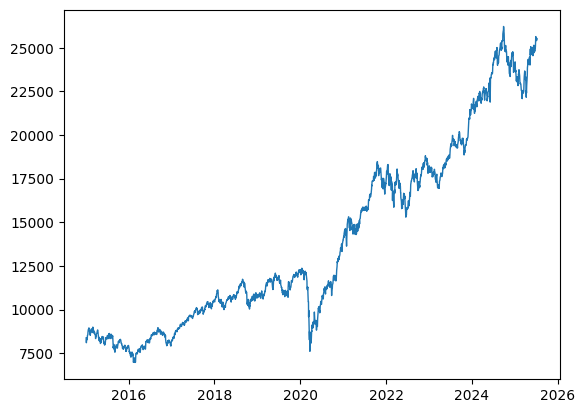

In [3]:
print(df.Close.describe())
plt.plot(df.Date, df.Close, lw = 1)

In [4]:
returns = df['Returns']
mu, std = norm.fit(returns)
returns.describe()

count    2586.000000
mean        0.000430
std         0.010478
min        -0.139038
25%        -0.004375
50%         0.000636
75%         0.006025
max         0.084003
Name: Returns, dtype: float64

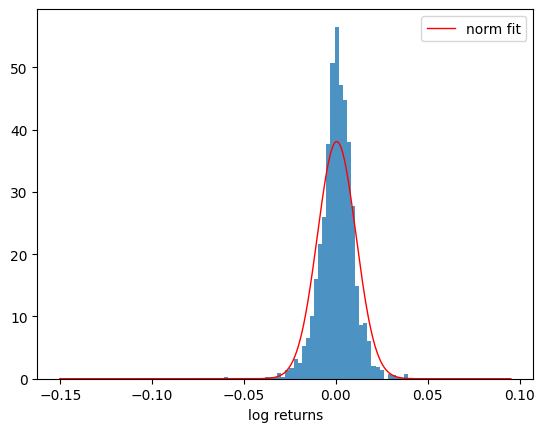

In [5]:
plt.hist(returns, bins=100, density=True, alpha = .8)
x_start, x_end = plt.xlim()
x = np.linspace(x_start, x_end, 500)
plt.plot(x, norm.pdf(x, mu, std), lw = 1, c ='r', label = "norm fit")
plt.legend()
plt.xlabel("log returns")
plt.show()

Returns are not normally distributed.
- This is well known see [*Bo Li*, An explanation for the distribution characteristics of stock returns](https://arxiv.org/pdf/2312.02472v1))
- Even so, the plot above is weirdly out of whack.

c:\Users\borishan\Desktop\ml\code\ml_vs_baseline_reits\utils\ticker_data.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


c:\Users\borishan\Desktop\ml\code\ml_vs_baseline_reits\utils\ticker_data.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
c:\Users\borishan\Desktop\ml\code\ml_vs_baseline_reits\utils\ticker_data.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
c:\Users\borishan\Desktop\ml\code\ml_vs_baseline_reits\utils\ticker_data.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


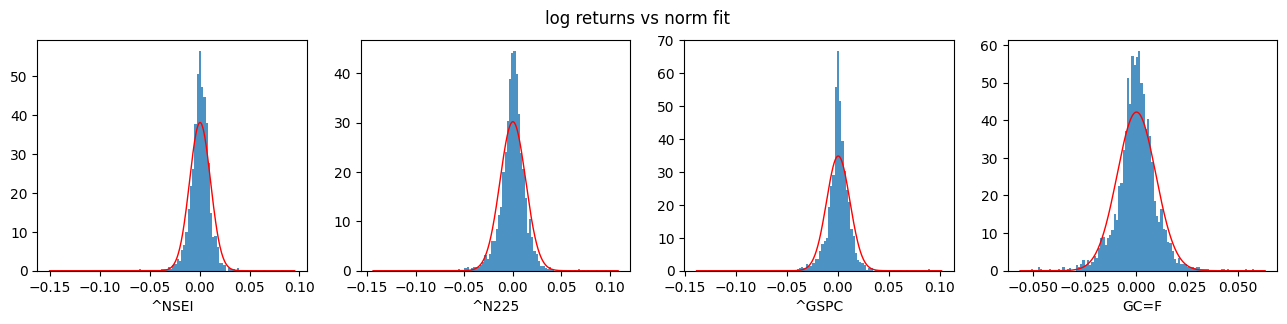

In [6]:
def plot_tickers(tickers):
    plt.figure(figsize=(4*len(tickers), 3))
    for i, ticker in enumerate(tickers):
        plt.subplot(1, len(tickers), i+1)
        
        df = get_stock_data(ticker, start="2015-01-01")
        returns = df.Returns
        plt.hist(returns, bins=100, density=True, alpha = .8)
        
        mu, std = norm.fit(returns)
        x_start, x_end = plt.xlim()
        x = np.linspace(x_start, x_end, 500)
        plt.plot(x, norm.pdf(x, mu, std), lw = 1, c ='r', label = "norm fit")
        
        plt.xlabel(ticker)
    plt.suptitle("log returns vs norm fit")
    plt.show()

plot_tickers(["^NSEI", "^N225", "^GSPC", "GC=F"])